## 1. Introdução
___
A análise exploratória a seguir foi realizada utilizando dados das avaliações de filmes realizadas no site <a>https://www.imdb.com</a>
___
### Perguntas a serem respondidas:
* Qual filme você recomendaria para uma pessoa que você não
conhece?
<br>
Resposta: The Godfather (O Poderoso Chefão)
<br><br>
* Quais são os principais fatores que estão relacionados com alta
expectativa de faturamento de um filme?
<br>
Resposta:
<br><br>
* Quais insights podem ser tirados com a coluna Overview? É possível
inferir o gênero do filme a partir dessa coluna?
<br>
Resposta:


In [400]:
from src import data_tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

plt.style.use('ggplot')

a


In [401]:
imdb = pd.read_csv("data/desafio_indicium_imdb.csv", index_col=0, encoding='utf-8')
df = pd.DataFrame(imdb)
df.shape
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [403]:
# Limpeza e transformação de dados
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)
df['No_of_Votes'] = df['No_of_Votes'].replace('[,]', '', regex=True).astype(int)
df['Runtime'] = df['Runtime'].replace('[ min]', '', regex=True).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int32  
 14  Gross          830 non-null    float64
dtypes: float64(3), int32(2), object(10)
memory usage: 117.1+ KB


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Pedro\AppData\Local\Temp\ipykernel_15632\64179420.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)


In [404]:
#Qual o filme mais avaliado?
print(f'número total de votos: {df['No_of_Votes'].max()}')
index = df['No_of_Votes'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

número total de votos: 2303232
nome do filme: The Dark Knight
ano de lançamento: 2008
nota do filme: 9.0
Meta Score: 84.0
Faturamento do filme: 534858444.0


In [405]:
#Qual o filme menos avaliado?
print(f'número total de votos: {df['No_of_Votes'].min()}')
index = df['No_of_Votes'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

número total de votos: 25088
nome do filme: Ba wang bie ji
ano de lançamento: 1993
nota do filme: 8.1
Meta Score: nan
Faturamento do filme: 5216888.0


In [406]:
#filme com maior faturamento?
print(f'Faturamento máximo: {df['Gross'].max()}')
index = df['Gross'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score máximo: {df['Meta_score'].max()}')
print(f'número total de votos: {df['No_of_Votes'][index]}')

Faturamento máximo: 936662225.0
nome do filme: Star Wars: Episode VII - The Force Awakens
ano de lançamento: 2015
nota do filme: 7.9
Meta Score máximo: 100.0
número total de votos: 860823


In [407]:
#filme com menor faturamento?
print(f'Faturamento mínimo: {df['Gross'].min()}')
index = df['Gross'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'nota do filme: {df['IMDB_Rating'][index]}')
print(f'Meta Score mínimo: {df['Meta_score'].min()}')
print(f'número total de votos: {df['No_of_Votes'][index]}')

Faturamento mínimo: 1305.0
nome do filme: Adams æbler
ano de lançamento: 2005
nota do filme: 7.8
Meta Score mínimo: 28.0
número total de votos: 45717


In [408]:
#Filme com maior nota?
print(f'Maior nota: {df['IMDB_Rating'].max()}')
index = df['IMDB_Rating'].idxmax()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'Meta Score máximo: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

Maior nota: 9.2
nome do filme: The Godfather
ano de lançamento: 1972
Meta Score máximo: 100.0
Faturamento do filme: 134966411.0


In [409]:
#filme com menor nota?
print(f'Menor nota: {df['IMDB_Rating'].min()}')
index = df['IMDB_Rating'].idxmin()
print(f'nome do filme: {df['Series_Title'][index]}')
print(f'ano de lançamento: {df['Released_Year'][index]}')
print(f'Meta Score mínimo: {df['Meta_score'][index]}')
print(f'Faturamento do filme: {df['Gross'][index]}')

Menor nota: 7.6
nome do filme: Dark Waters
ano de lançamento: 2019
Meta Score mínimo: 73.0
Faturamento do filme: nan


Text(0.5, 1.0, 'Correlação entre variáveis quantitativas contínuas')

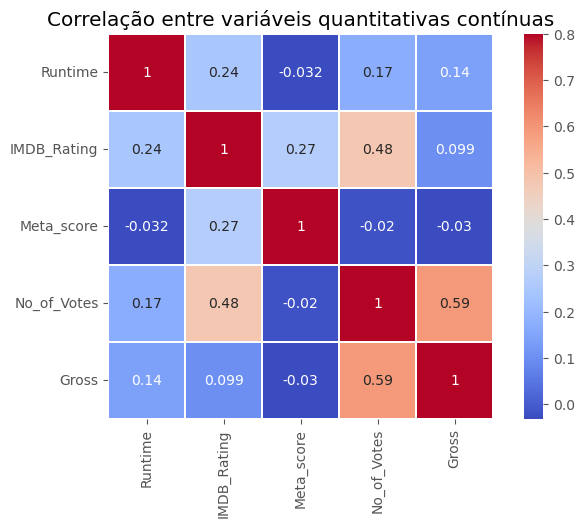

In [410]:
df_heat = df[['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
corr =df_heat.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis quantitativas contínuas')

In [411]:
conn = sqlite3.connect(':memory:')
df.to_sql('movies', conn, index=False, if_exists='replace')
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies WHERE IMDB_Rating >= 8 ORDER BY No_of_Votes DESC LIMIT(5)', conn)
print(result_df)

      Series_Title  No_of_Votes  IMDB_Rating
0  The Dark Knight      2303232          9.0
1        Inception      2067042          8.8
2       Fight Club      1854740          8.8
3     Pulp Fiction      1826188          8.9
4     Forrest Gump      1809221          8.8


In [412]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies WHERE IMDB_Rating >= 9 ORDER BY No_of_Votes DESC LIMIT(5)', conn)
print(result_df)

             Series_Title  No_of_Votes  IMDB_Rating
0         The Dark Knight      2303232          9.0
1           The Godfather      1620367          9.2
2  The Godfather: Part II      1129952          9.0
3            12 Angry Men       689845          9.0


In [425]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies ORDER BY IMDB_Rating DESC LIMIT(10)', conn)
result_df.head(10)

,Series_Title,No_of_Votes,IMDB_Rating
0,The Godfather,1620367,9.2
1,The Dark Knight,2303232,9.0
2,The Godfather: Part II,1129952,9.0
3,12 Angry Men,689845,9.0
4,The Lord of the Rings: The Return of the King,1642758,8.9
5,Pulp Fiction,1826188,8.9
6,Schindler's List,1213505,8.9
7,Inception,2067042,8.8
8,Fight Club,1854740,8.8
9,The Lord of the Rings: The Fellowship of the Ring,1661481,8.8


In [413]:
result_df = pd.read_sql('SELECT Series_Title, No_of_Votes,IMDB_Rating FROM movies ORDER BY No_of_Votes DESC LIMIT(10)', conn)
result_df.head(10)

,Series_Title,No_of_Votes,IMDB_Rating
0,The Dark Knight,2303232,9.0
1,Inception,2067042,8.8
2,Fight Club,1854740,8.8
3,Pulp Fiction,1826188,8.9
4,Forrest Gump,1809221,8.8
5,The Matrix,1676426,8.7
6,The Lord of the Rings: The Fellowship of the Ring,1661481,8.8
7,The Lord of the Rings: The Return of the King,1642758,8.9
8,The Godfather,1620367,9.2
9,The Dark Knight Rises,1516346,8.4


<p>Uma forma de remover a alta influência causado pelo número de avaliações (No_of_Votes), encontrada não só nas queries acimas mas também indicadas com uma correlação de 0.48, é utilizando a Média Bayesiana.</p>

In [414]:
total_sum_ratings = (df['IMDB_Rating'] * df['No_of_Votes']).sum()
total_votes = df['No_of_Votes'].sum()
global_true_mean = total_sum_ratings / total_votes

print(f"Média Global Verdadeira (m): {global_true_mean:.6f}")
print(f"Total de Votos no Sistema: {total_votes:,}")

Média Global Verdadeira (m): 8.101988
Total de Votos no Sistema: 271,349,801


In [415]:
C = df['No_of_Votes'].quantile(0.9)
print(f"\nConstante de Confiança (C - 90º percentil de votos): {C:.0f}")


Constante de Confiança (C - 90º percentil de votos): 694913


In [416]:
df['Bayesian_Avg'] = ((C * global_true_mean) + (df['IMDB_Rating'] * df['No_of_Votes']) )/(C + df['No_of_Votes'])
df['Bayesian_Avg'] = df['Bayesian_Avg'].round(5)

In [417]:
rank_df = df[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Bayesian_Avg']].copy()
rank_df['Difference'] = results_df['Bayesian_Avg'] - results_df['IMDB_Rating']
beneficiados = results_df.nlargest(10, 'Difference')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Bayesian_Avg', 'Difference']]
punidos = results_df.nsmallest(10, 'Difference')[['Series_Title', 'No_of_Votes', 'IMDB_Rating', 'Bayesian_Avg', 'Difference']]
print(beneficiados.to_string(index=False))
print('\n')
print(punidos.to_string(index=False))

       Series_Title  No_of_Votes  IMDB_Rating  Bayesian_Avg  Difference
   The Long Goodbye        26337          7.6       7.88308     0.28308
           Lifeboat        26471          7.6       7.88245     0.28245
  Omohide poro poro        27071          7.6       7.87968     0.27968
     On Golden Pond        27650          7.6       7.87705     0.27705
           Nelyubov        29765          7.6       7.86787     0.26787
       Giù la testa        30144          7.6       7.86629     0.26629
The Secret of Kells        31779          7.6       7.85968     0.25968
   The Muppet Movie        32802          7.6       7.85570     0.25570
     Watership Down        33656          7.6       7.85248     0.25248
              Giant        34075          7.6       7.85093     0.25093


             Series_Title  No_of_Votes  IMDB_Rating  Bayesian_Avg  Difference
                  Seppuku        42004          8.6       8.37701    -0.22299
          Soorarai Pottru        54995          8.

In [424]:
df.to_sql('movies', conn, index=False, if_exists='replace')
result_df = pd.read_sql('SELECT Series_Title,Bayesian_Avg FROM movies WHERE Bayesian_Avg >= 8 ORDER BY Bayesian_Avg DESC LIMIT(10)', conn)
result_df.head(10)

,Series_Title,Bayesian_Avg
0,The Godfather,8.87044
1,The Dark Knight,8.79186
2,Pulp Fiction,8.68004
3,The Lord of the Rings: The Return of the King,8.66278
4,The Godfather: Part II,8.65803
5,Inception,8.62438
6,Fight Club,8.60976
7,Schindler's List,8.60942
8,Forrest Gump,8.60630
9,The Lord of the Rings: The Fellowship of the Ring,8.59415


<p>Levando em consideração a Média Bayesiana podemos notar que a ordenação do ranking se mostra diferente das duas obtidas anteriormente, seja a que considerava ou a que desconsiderava o número de votos. Agora estamos trabalhando com um novo índice (Bayesian_Avg), que busca equilibrar o impacto da correlação das variáveis IMDB_Rating e No_of_Votes.</p>